In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc

'''
longitude 是纬度，共有 360* 4 = 1440 个点, 
latitude 是经度，共有 180*2 + 1 = 361 个点,
time 时间是从1982年1月开始
sst 是361 * 1440 的矩阵
'''
file = './SST.nc'
dataset = nc.Dataset(file)
# print(dataset.variables.keys())

longitude, latitude = dataset.variables['longitude'],dataset.variables['latitude']
time = dataset.variables['time']
sst =dataset.variables['sst']

In [2]:
sum_month = np.zeros(sst[:1].data.shape, dtype=float, order='C') # 创建空矩阵
num_month = time[:].data.shape[0] # 创建空时间矩阵
num_month_1997to1982 = (1998 - 1982) * 12 #计算1982年1月到1997年12月的月数
num_month_2021to1998 = (2022 - 1998) * 12 #计算1998年1月到2021年12月的月数

sum_month_1982to1997 = sum_month
# 求和：1982年1月到1997年12月的sst矩阵
for i in range(0, num_month_1997to1982+1): 
    temp_pre = sst[i:i+1].data
    sum_month_1982to1997 += temp_pre
# 求平均
mean_1982to1997 = sum_month_1982to1997 / num_month_1997to1982
mean_1982to1997 = np.where(mean_1982to1997 > 0, mean_1982to1997, 0) # 如果是负数则定义为0

sum_month_1998to2021 = sum_month
# # 求和：1998年1月到2021年12月的sst矩阵
for i in range(num_month_1997to1982, num_month_2021to1998+1):
    temp_pre = sst[i:i+1].data
    sum_month_1998to2021 += temp_pre
# 求平均
mean_1998to2021 = sum_month_1998to2021 / num_month_2021to1998
mean_1998to2021 = np.where(mean_1998to2021 > 0, mean_1998to2021, 0) # 如果是负数则定义为0
# 两个阶段的插值
diff = mean_1998to2021 - mean_1982to1997


In [29]:
# a, b = np.hsplit(diff[0], [720])
# diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据
# # 定义数据
# # data = diff_pacific_contre
# data = diff_pacific_contre
# data = np.where(diff_pacific_contre > 0, diff_pacific_contre, -0.6)
lat  = latitude[:].data
lon  = longitude[:].data
# c, d = np.hsplit(lon, [720])
# lon_pacific_contre = np.concatenate([d, c+360]) # 转换为以太平洋为中心的数据


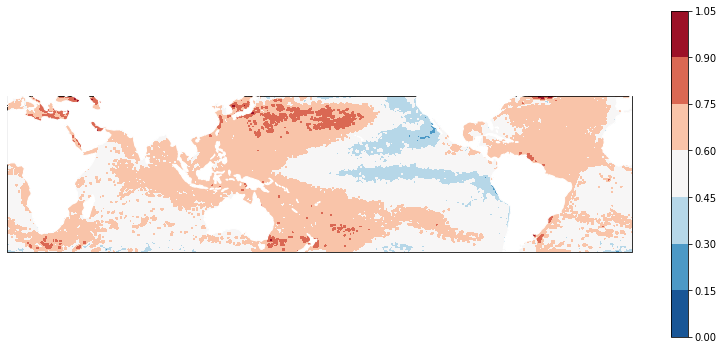

In [31]:
import cartopy.crs as ccrs
import cartopy as cart
# import sacpy.Map


lat  = latitude[:].data
lon  = longitude[:].data


fig = plt.figure(figsize=[14, 6])

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k', color='white')
# m = ax.scontourf(lon, lat, diff)

m = ax.contourf(lon, lat, diff, level=[0.1, 0.3, 0.6, 0.9],
#                 hatches='///',
                transform=cart.crs.PlateCarree())

# n = ax.sig_plot(lon, lat, diff, color="k", marker="///")

# ax.init_map(stepx=60, smally =2.5)

plt.colorbar(m)

In [22]:
type(diff_pacific_contre)


numpy.ndarray

In [ ]:

fig = plt.figure(figsize=[7, 3])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
# lon ,lat = np.array(ssta.lon) , np.array(ssta.lat)
# linreg.mask()

m = ax.scontourf(lon,lat,linreg.corr)
n = ax.sig_plot(lon,lat,linreg.p_value,color="k",marker="..")
ax.init_map(stepx=50, smally=2.5)
plt.colorbar(m)
# plt.savefig("../pic/nino34.png",dpi=200)